# EDA

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', None)
%matplotlib inline

In [19]:
na_values = ['nan', 'na','#VALUE!','missing']
train = pd.read_csv('data/TrainingData.csv', na_values=na_values)
test = pd.read_csv('data/testX.csv', na_values=na_values)

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['mvar47'] = le.fit_transform(train['mvar47'])
test['mvar47'] = le.transform(test['mvar47'])

In [21]:
X = train.drop(['application_key', 'default_ind'], axis=1)
y = train[['default_ind']]

In [22]:
train

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
0,230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,NaN,6423.0,3067.0,123875,NaN,1.0,1.0,1.0,3.0,3.0,94.780,8987.18,NaN,72.25,1462.0,4532.0,2890.0,61.0,4532.0,1095.0,3376.0,625.0,1.1667,1.0,0.0,8.0,10.0,4.0,1.0,73.780,82.547,0.08696,10.0,0.63899,NaN,0.0,0,10,770,4.0,3080.0,0
1,230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,NaN,765.0,1931.0,42613,NaN,0.0,0.0,0.0,0.0,0.0,74.250,953.06,953.06,4.80,1028.0,2099.0,2099.0,30386.0,2281.0,NaN,2251.0,169.0,0.4167,0.0,0.0,8.0,0.0,2.0,0.0,99.129,NaN,0.00000,13.0,0.63836,NaN,NaN,1,732,437,5.0,2185.0,1
2,230034,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,NaN,NaN,NaN,76109,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,669.0,4623.0,3772.0,NaN,NaN,25.0833,0.0,NaN,1.0,NaN,1.0,0.0,NaN,29.290,0.00000,1.0,1.00000,NaN,0.0,0,89,795,4.0,3180.0,1
3,230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,NaN,0.0,0.0,84235,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.00,NaN,0.00,1308.0,2525.0,791.0,91.0,5992.0,NaN,3741.0,215.0,10.3333,0.0,0.0,3.0,3.0,2.0,0.0,96.272,NaN,0.15385,3.0,0.53241,0.0,0.0,1,3,755,4.0,3020.0,0
4,230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,NaN,2257.0,27815.0,123875,524848.0,0.0,0.0,0.0,0.0,0.0,20.510,796.67,NaN,28.72,801.0,2281.0,2281.0,487.0,2707.0,NaN,1947.0,158.0,0.9167,0.0,0.0,2.0,3.0,2.0,0.0,115.019,NaN,0.00000,1.0,0.92665,NaN,NaN,1,5,425,4.0,1700.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82995,578064,1748.0,0.3044,0.000,0.0,0.0,0.0,20114.0,5574.0,77386.0,81647.0,282.0,48222.0,65360.0,148650,267601.0,1.0,1.0,1.0,3.0,4.0,98.702,9558.40,NaN,90.11,3219.0,8091.0,8091.0,30.0,8091.0,3802.0,NaN,635.0,16.0833,0.0,0.0,11.0,3.0,4.0,0.0,NaN,8.445,0.04348,13.0,0.48002,0.0,0.0,1,13,678,4.0,2712.0,0
82996,578065,1846.0,NaN,0.000,0.0,0.0,793.0,18608.0,18608.0,63820.0,29187.0,NaN,7863.0,67980.0,79280,NaN,0.0,0.0,0.0,0.0,0.0,19.885,0.00,0.00,17.27,3207.0,2342.0,2342.0,1004.0,7969.0,NaN,NaN,949.0,21.3333,0.0,NaN,2.0,6.0,1.0,0.0,NaN,NaN,0.00000,5.0,0.46925,NaN,0.0,1,24,759,5.0,3795.0,0
82997,578066,1907.0,0.0381,0.000,0.0,0.0,2478.0,24775.0,24775.0,100294.0,88249.0,NaN,2968.0,59767.0,99100,NaN,0.0,0.0,0.0,0.0,0.0,9.967,NaN,NaN,3.54,2038.0,5049.0,5049.0,30386.0,5536.0,4076.0,5505.0,938.0,4.5833,0.0,NaN,14.0,8.0,0.0,0.0,137.164,42.857,0.00000,19.0,0.67960,NaN,0.0,1,3,724,5.0,3620.0,0
82998,578067,1744.0,1.8301,0.000,0.0,0.0,496.0,917.0,496.0,116164.0,2218.0,NaN,656.0,4108.0,9910,NaN,0.0,0.0,0.0,1.0,1.0,NaN,2552.63,2552.63,17.70,2488.0,5445.0,5445.0,760.0,6631.0,4806.0,NaN,1880.0,1.5833,0.0,NaN,1.0,22.0,4.0,0.0,NaN,NaN,0.09375,3.0,0.45317,NaN,0.0,1,19,631,4.0,2524.0,0


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  int64  
 1   mvar1            79267 non-null  float64
 2   mvar2            77114 non-null  float64
 3   mvar3            82465 non-null  float64
 4   mvar4            82465 non-null  float64
 5   mvar5            82465 non-null  float64
 6   mvar6            63299 non-null  float64
 7   mvar7            75326 non-null  float64
 8   mvar8            63291 non-null  float64
 9   mvar9            71318 non-null  float64
 10  mvar10           82465 non-null  float64
 11  mvar11           36283 non-null  float64
 12  mvar12           68422 non-null  float64
 13  mvar13           73311 non-null  float64
 14  mvar14           83000 non-null  int64  
 15  mvar15           49481 non-null  float64
 16  mvar16           63757 non-null  float64
 17  mvar17      

In [24]:
train.nunique()

application_key    83000
mvar1                454
mvar2              24656
mvar3              18949
mvar4               4758
mvar5               4089
mvar6               7389
mvar7              29001
mvar8              16099
mvar9              30441
mvar10             40624
mvar11             11853
mvar12             20200
mvar13             27984
mvar14              1675
mvar15             33893
mvar16                12
mvar17                15
mvar18                15
mvar19                26
mvar20                28
mvar21             26854
mvar22             32918
mvar23             22728
mvar24             14129
mvar25              5412
mvar26               621
mvar27               577
mvar28                95
mvar29               679
mvar30               281
mvar31               416
mvar32              2841
mvar33               583
mvar34                20
mvar35                10
mvar36                72
mvar37                57
mvar38                58
mvar39                19


In [25]:
train['mvar50'].value_counts()

4.0    56660
5.0    22607
Name: mvar50, dtype: int64

## Missing Value Visualisation

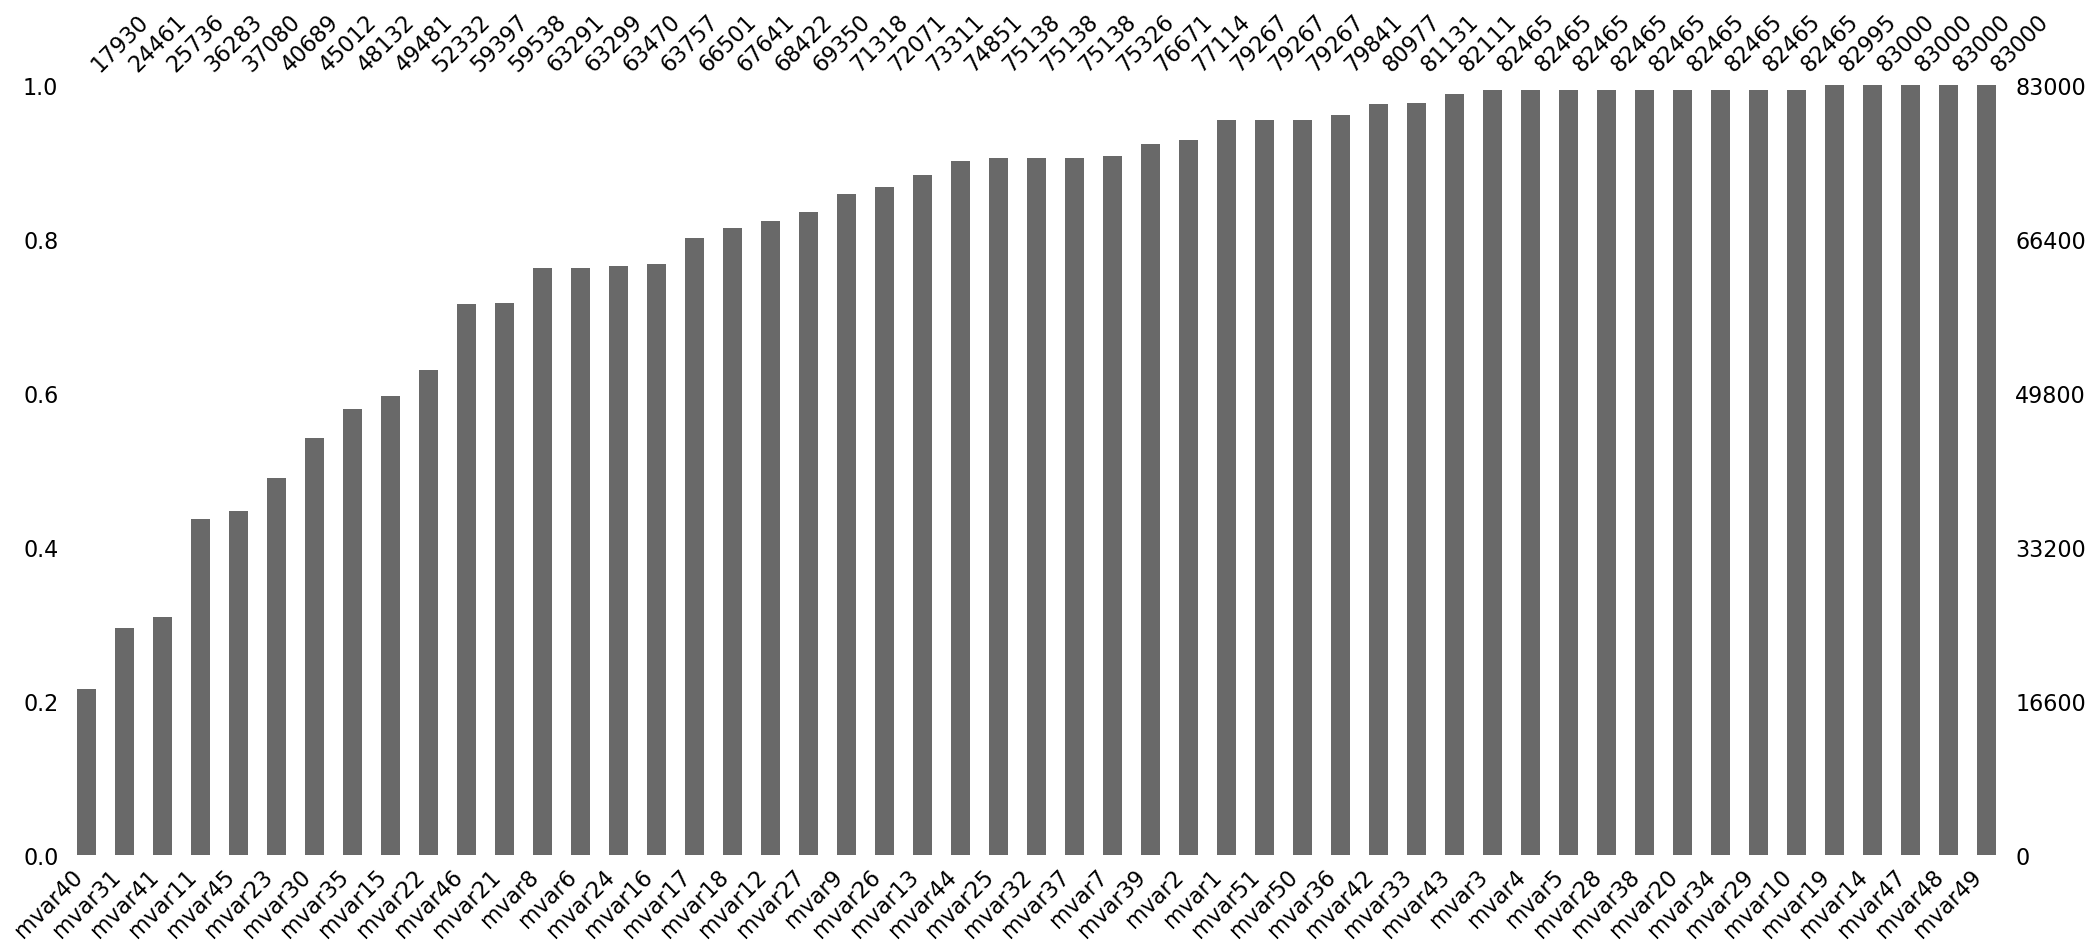

In [26]:
msno.bar(df=X, figsize=(25,10), fontsize=16, sort='ascending', labels=True)
plt.savefig('./figures/missing_bar.png', bbox_inches='tight')

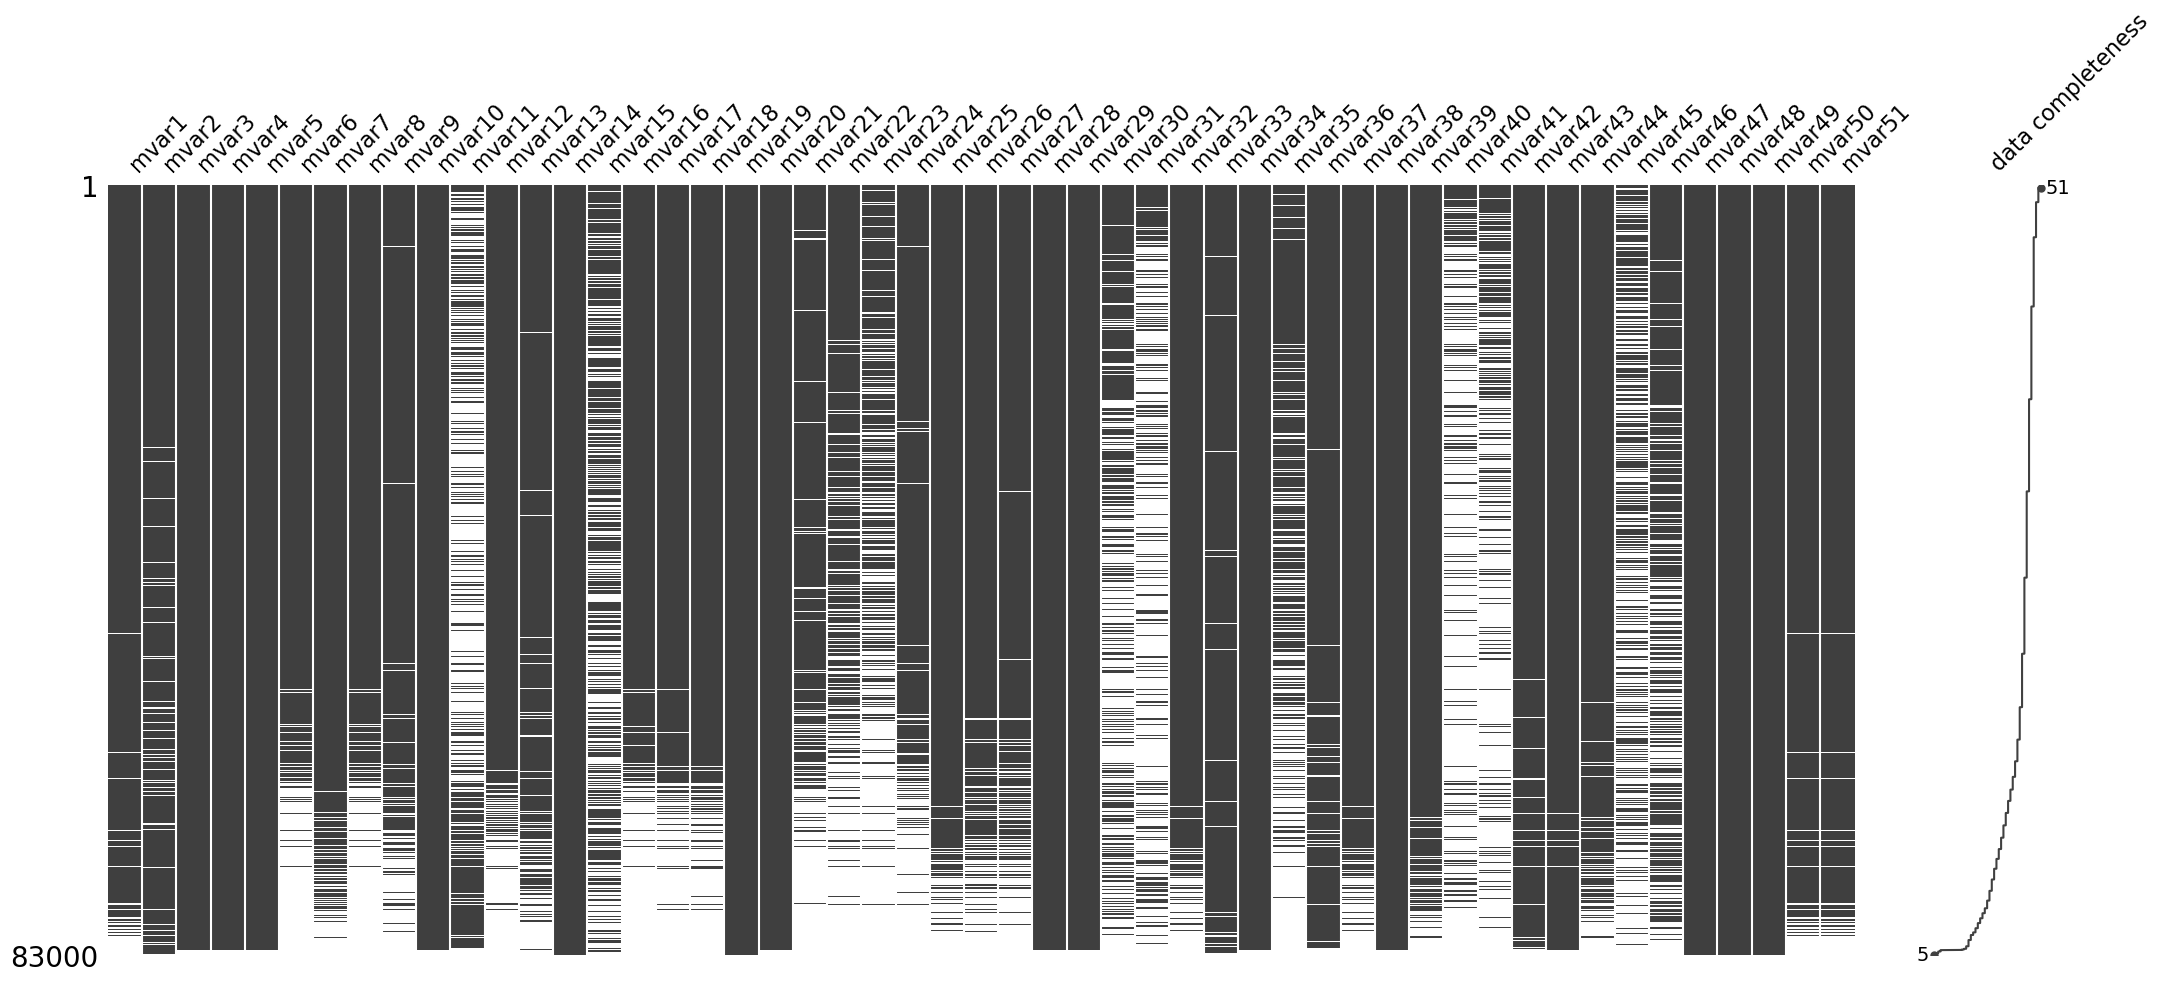

In [27]:
msno.matrix(df=X, sort='descending', figsize=(25,10), width_ratios=(15,1), fontsize=16, sparkline=True, labels=True)
plt.savefig('./figures/missing_matrix.png', bbox_inches='tight')

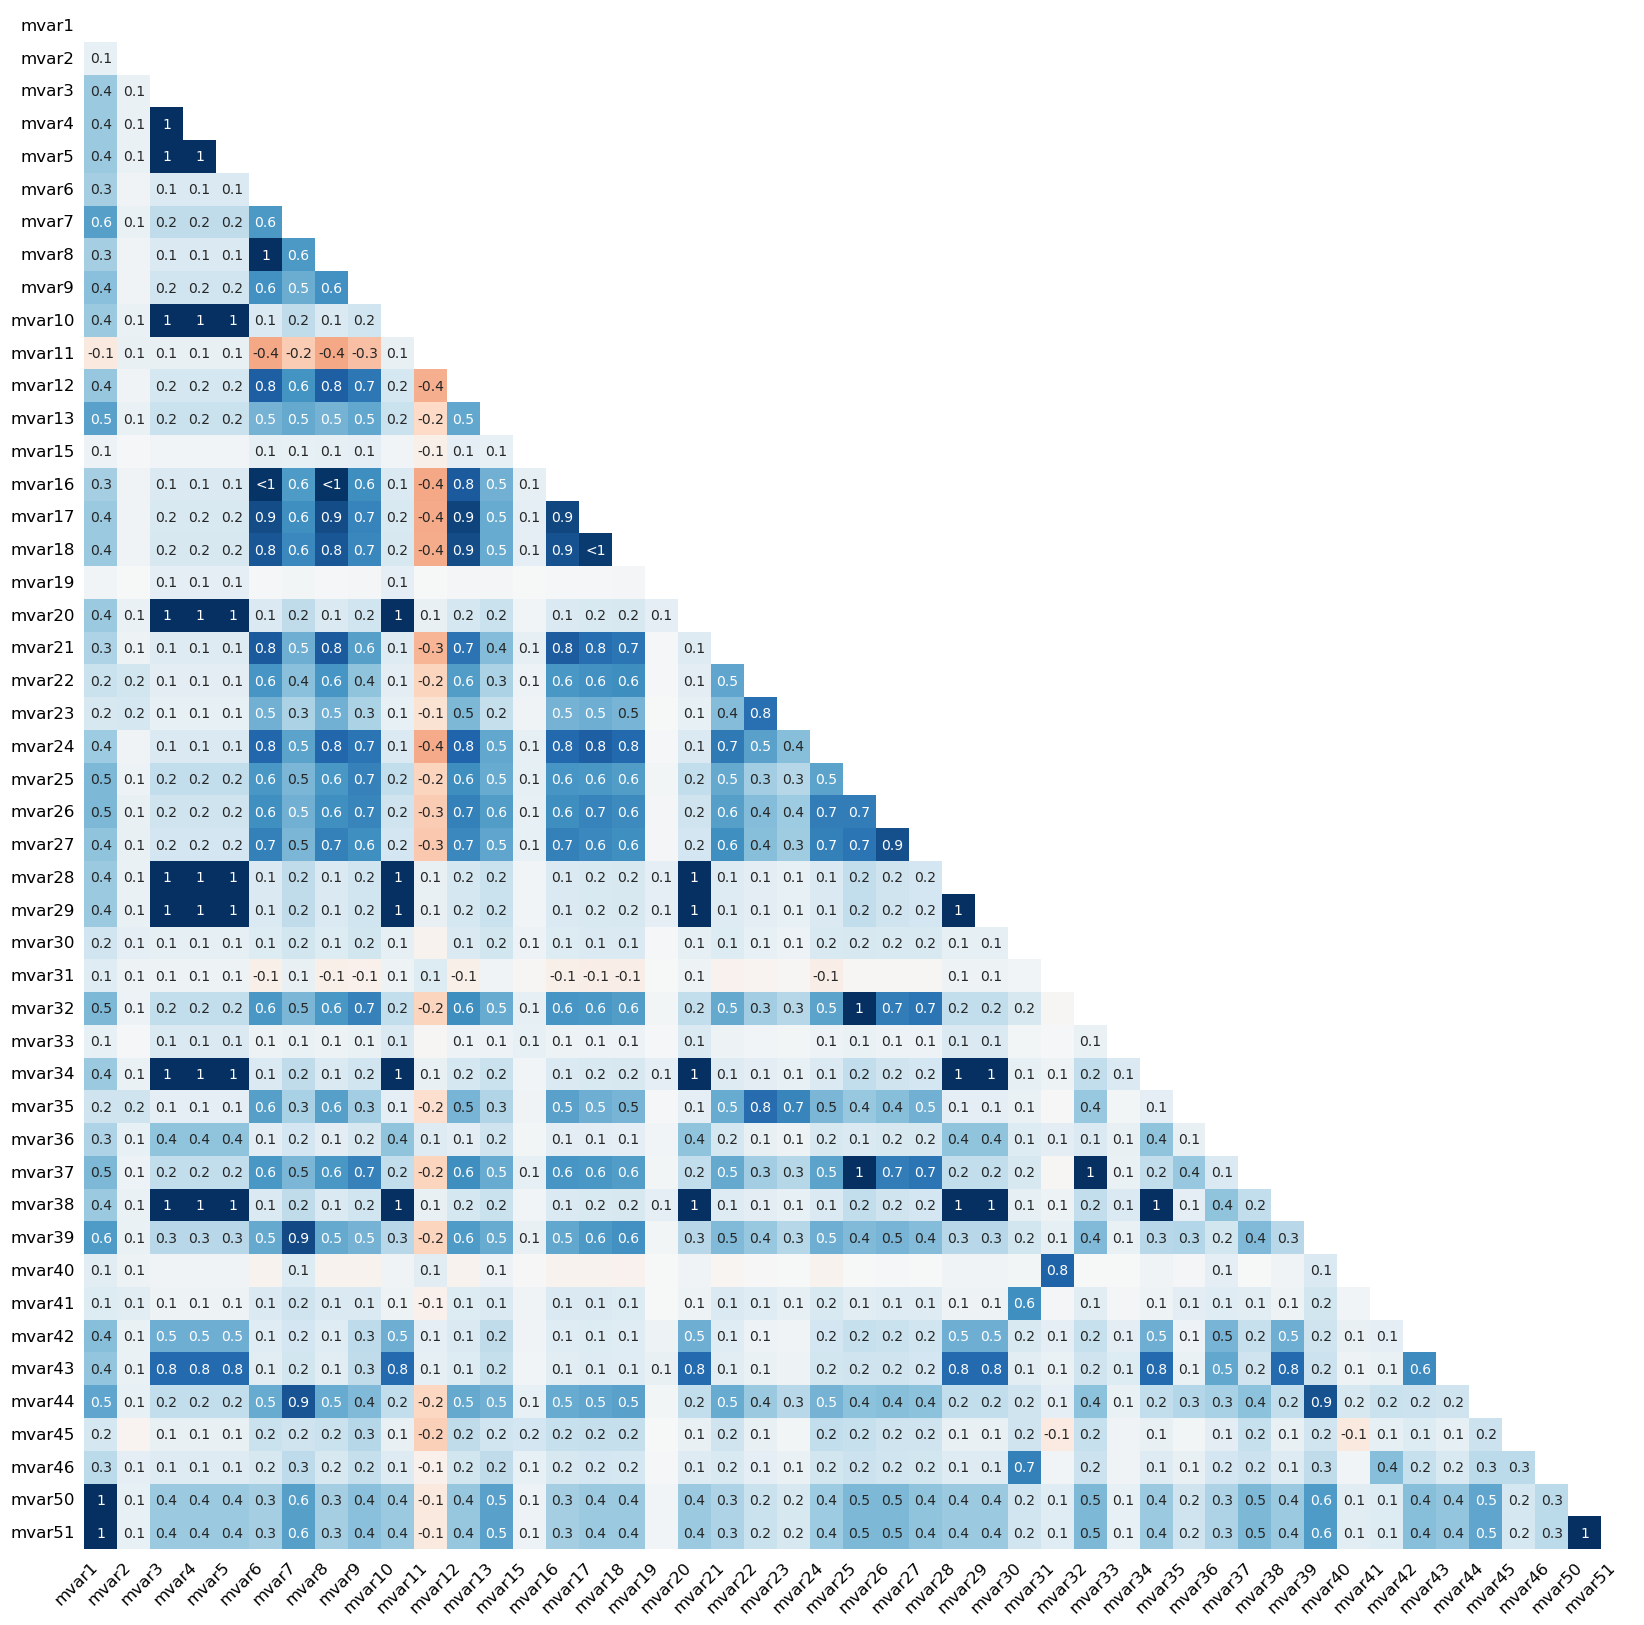

In [28]:
msno.heatmap(df=X, sort=None, figsize=(20,20), fontsize=12, labels=True, cbar=False)
plt.savefig('./figures/missing_heatmap.png', bbox_inches='tight')

## Feature Visualisation

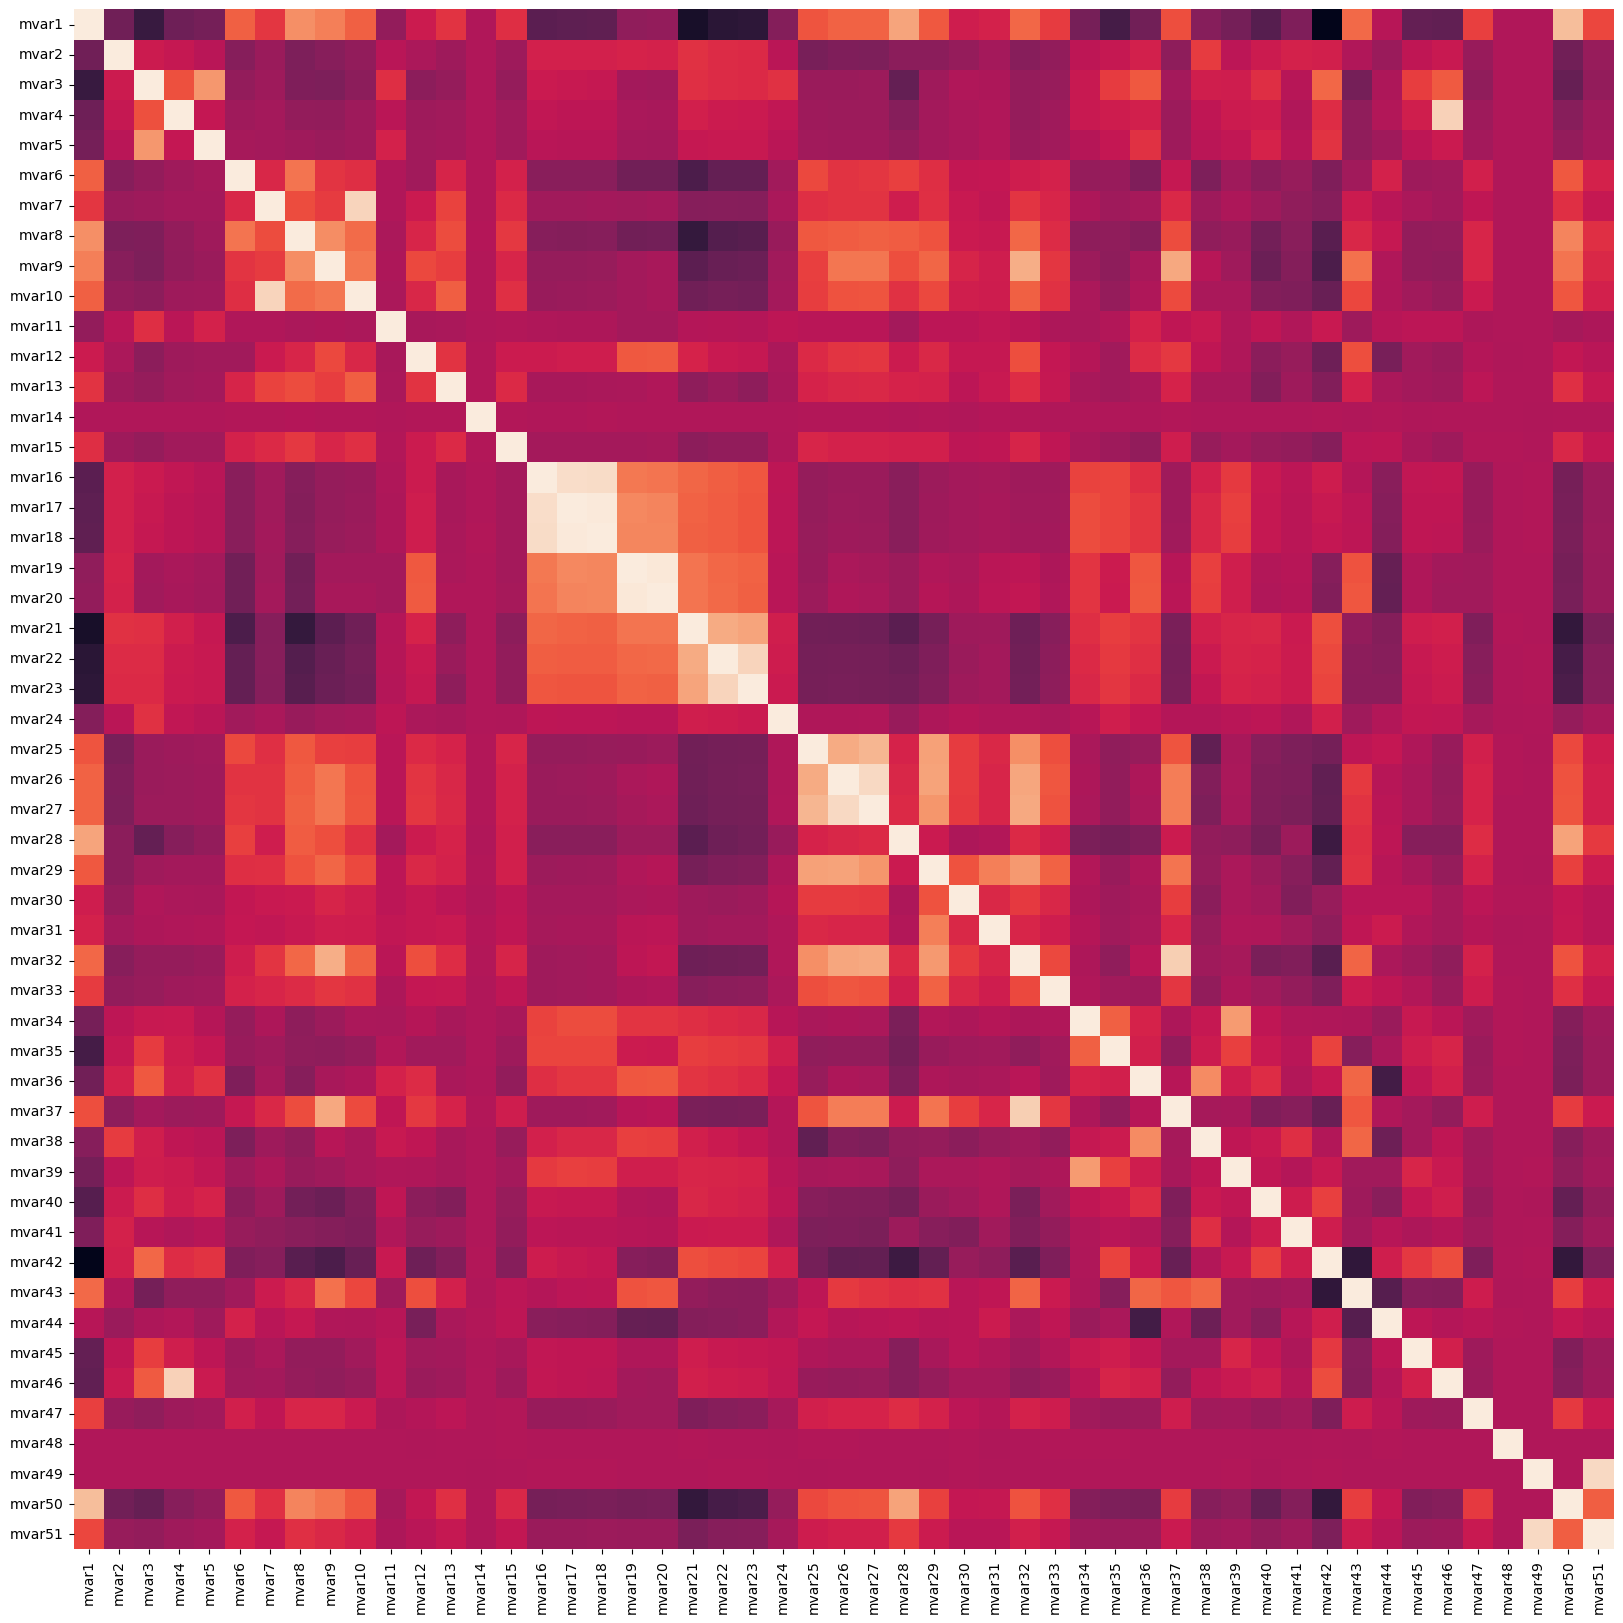

In [29]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
sns.heatmap(X.corr(), ax=ax, cbar=False, square=True)
None
plt.savefig('./figures/feature_heatmap.png', bbox_inches='tight')

C:\Users\abhip\AppData\Local\Temp\ipykernel_13480\694483612.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X.hist(ax=ax)


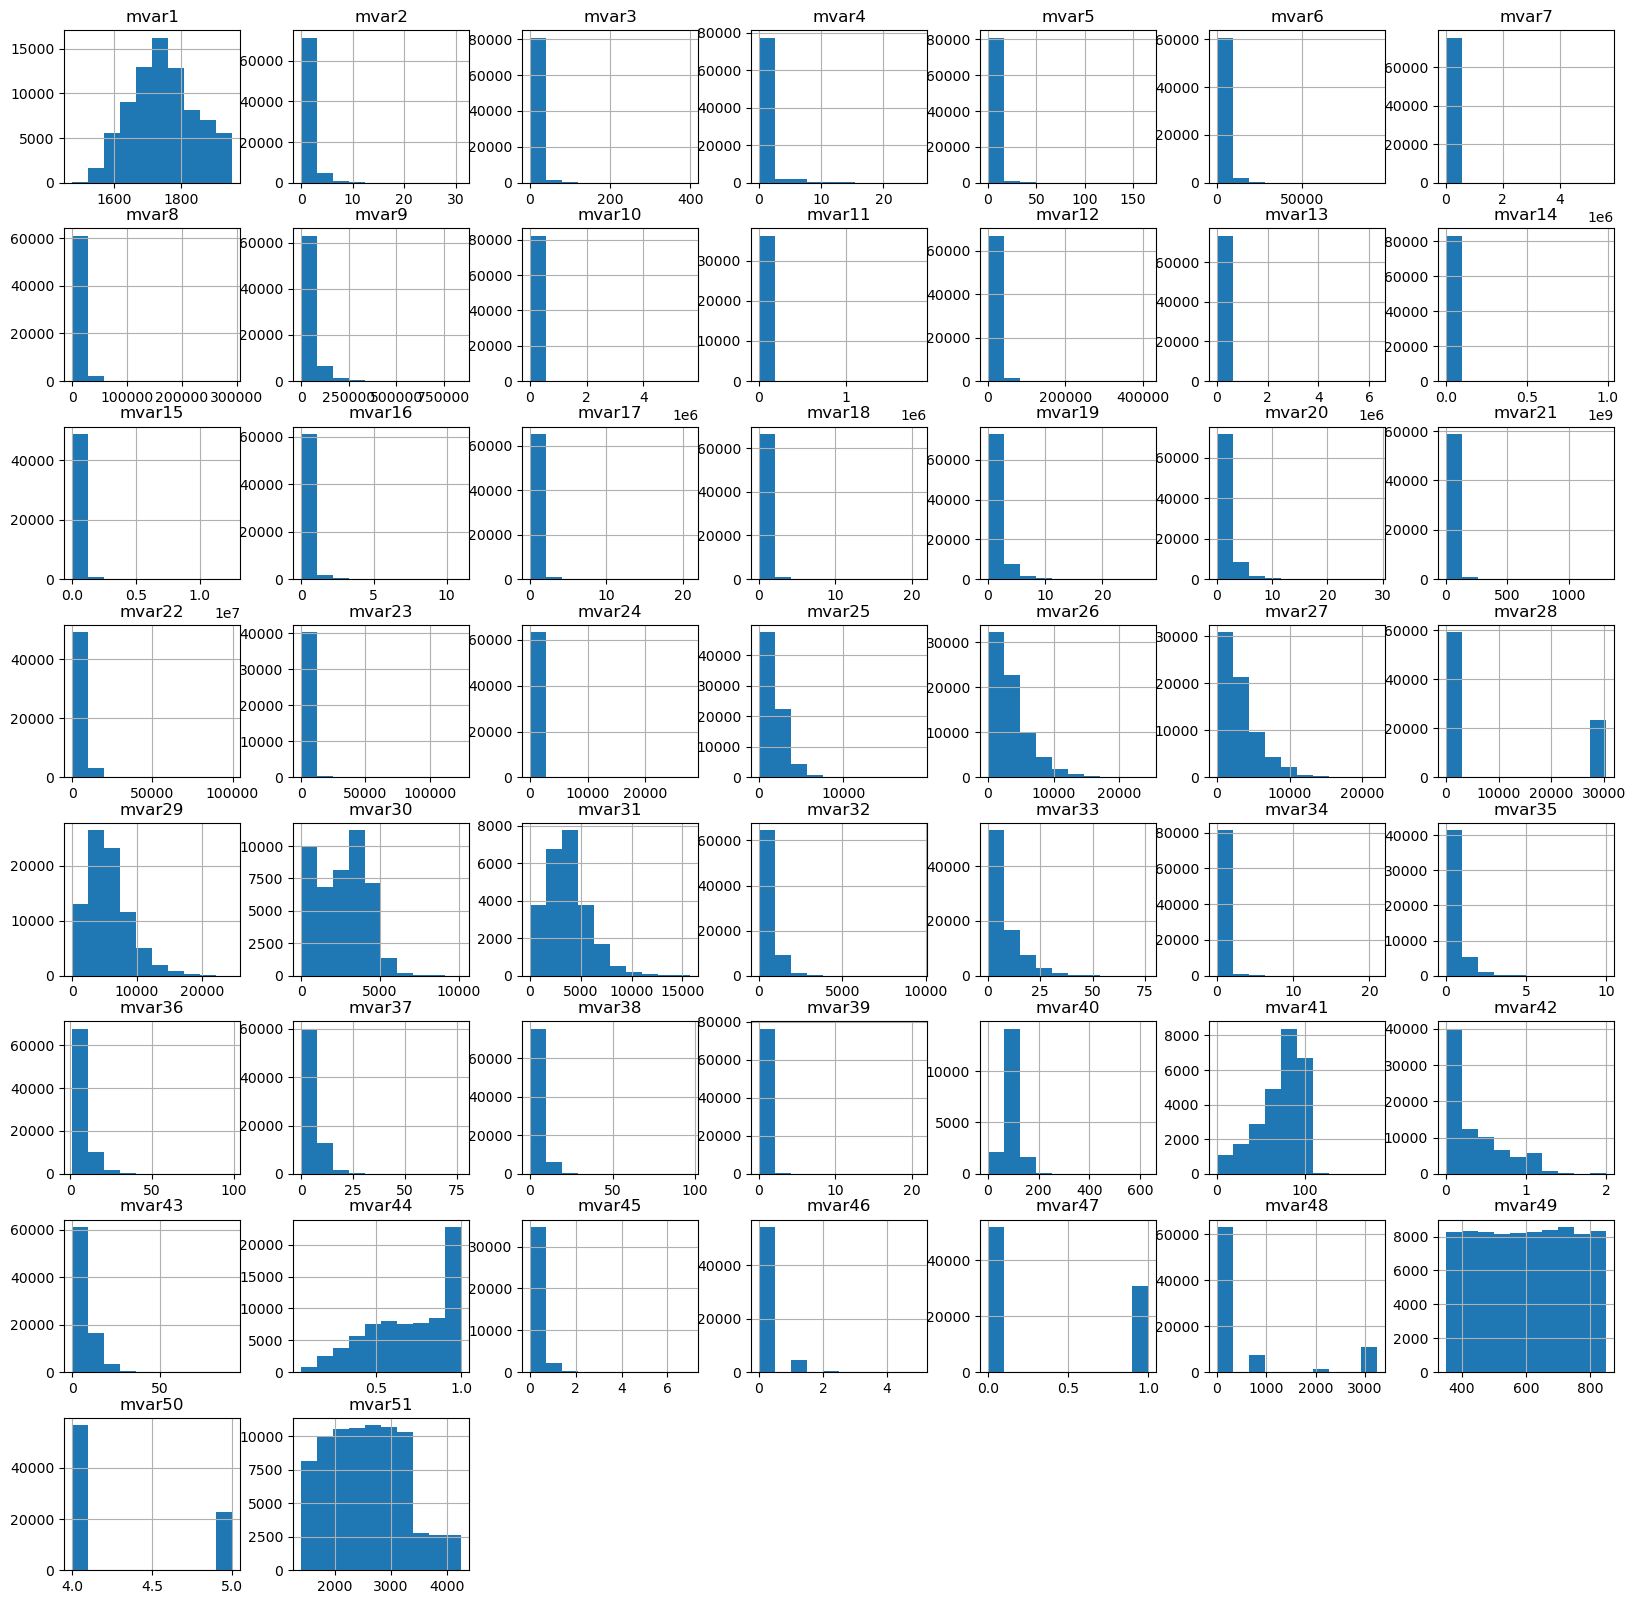

In [30]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
X.hist(ax=ax)
None
plt.savefig('./figures/feature_histograms.png', bbox_inches='tight')

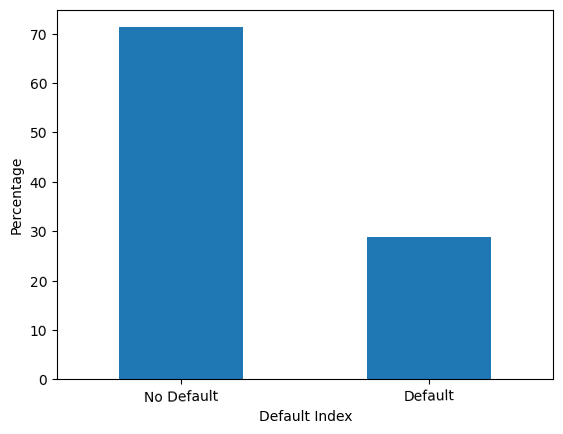

In [32]:
fig = plt.figure()
ax = fig.gca()
train['default_ind'].value_counts(normalize=True).mul(100).plot(kind='bar', ax=ax)
ax.set_xlabel('Default Index')
ax.set_xticks(ticks=ax.get_xticks(), labels=['No Default', 'Default'])
ax.tick_params(labelrotation=1)
ax.set_ylabel('Percentage')
# ax.set_title('Target Class Distribution')
None
plt.savefig('./figures/class_distribution.png', bbox_inches='tight')

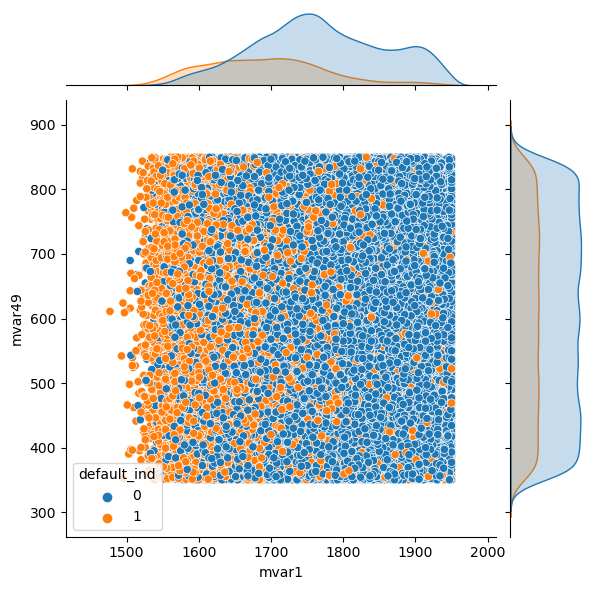

In [54]:
sns.jointplot(data=train, x='mvar1', y='mvar49', hue='default_ind', kind='scatter')
None
plt.savefig('./figures/mvar1_mvar49_jointplot.png', bbox_inches='tight')

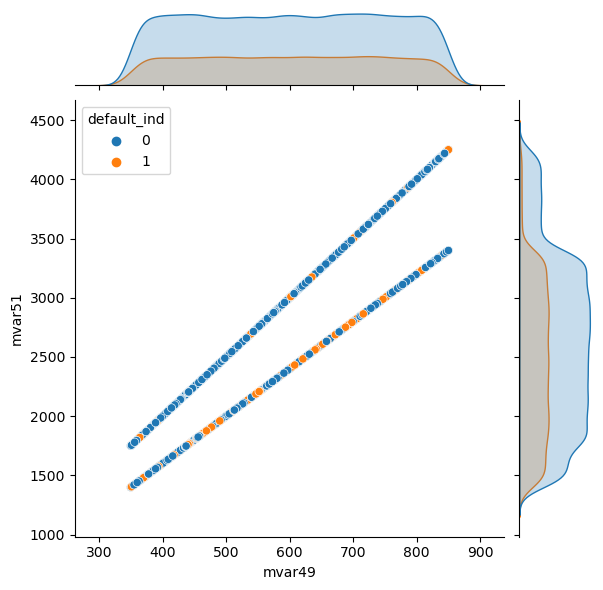

In [55]:
sns.jointplot(data=train, x='mvar49', y='mvar51', hue='default_ind', kind='scatter')
None
plt.savefig('./figures/mvar49_mvar51_jointplot.png', bbox_inches='tight')

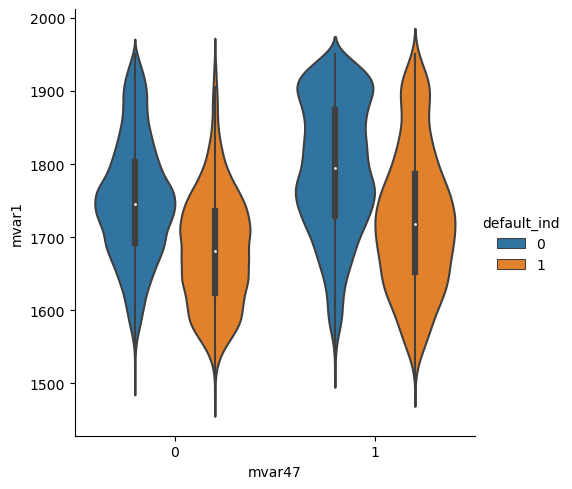

In [56]:
sns.catplot(data=train, x='mvar47', y='mvar1', hue='default_ind', kind='violin')
None
plt.savefig('./figures/mvar1_mvar47_catplot.png', bbox_inches='tight')